In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
bev = pd.read_json('registros_bev.json', orient='records')
bev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41614 entries, 0 to 41613
Data columns (total 69 columns):
FEC_MATRICULA                             41614 non-null int64
COD_CLASE_MAT                             41614 non-null int64
FEC_TRAMITACION                           329 non-null float64
MARCA_ITV                                 41614 non-null object
MODELO_ITV                                41614 non-null object
COD_PROCEDENCIA_ITV                       41614 non-null int64
BASTIDOR_ITV                              41614 non-null object
COD_TIPO                                  41613 non-null object
COD_PROPULSION_ITV                        41612 non-null float64
CILINDRADA_ITV                            41614 non-null int64
POTENCIA_ITV                              41614 non-null float64
TARA                                      41614 non-null int64
PESO_MAX                                  41614 non-null int64
NUM_PLAZAS                                41614 non-null int64
I

In [ ]:
#filtrar solo coches


In [20]:
bev['FEC_MATRICULA'] = pd.to_datetime(bev['FEC_MATRICULA'], format='%d%m%Y',  errors='coerce')

In [71]:
coches = bev.loc[bev['COD_TIPO'] == '40']
coches

,FEC_MATRICULA,COD_CLASE_MAT,FEC_TRAMITACION,MARCA_ITV,MODELO_ITV,COD_PROCEDENCIA_ITV,BASTIDOR_ITV,COD_TIPO,COD_PROPULSION_ITV,CILINDRADA_ITV,...,VERSIÓN_VEHÍCULO_BASE,DISTANCIA_EJES_12_ITV,VIA_ANTERIOR_ITV,VIA_POSTERIOR_ITV,TIPO_ALIMENTACION_ITV,CONTRASEÑA_HOMOLOGACION_ITV,ECO_INNOVACION_ITV,REDUCCION_ECO_ITV,CODIGO_ECO_ITV,FEC_PROCESO
0,2020-01-20,0,NaN,SEAT,MII,3,VSSZZZAAZLD500310,40,2.0,0,...,None,2417,1433,1428,M,None,N,0,None,2012020
1,2020-01-20,0,NaN,SEAT,MII,3,VSSZZZAAZLD500083,40,2.0,0,...,None,2417,1433,1428,M,None,N,0,None,2012020
2,2020-01-20,0,NaN,SEAT,MII,3,VSSZZZAAZLD500108,40,2.0,0,...,None,2417,1433,1428,M,None,N,0,None,2012020
4,2020-01-20,0,NaN,BMW I,I3,3,WBY8P210307F36314,40,2.0,0,...,None,2570,1602,1600,M,None,N,0,None,2012020
5,2020-01-20,0,NaN,SEAT,MII,3,VSSZZZAAZLD500084,40,2.0,0,...,None,2417,1433,1428,M,None,N,0,None,2012020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41608,2021-04-30,0,NaN,MCC SMART,EQ FORFOUR,3,W1A4530911Y245212,40,2.0,0,...,None,2494,1469,1434,M,None,None,None,None,30042021
41610,2021-04-30,0,NaN,RENAULT,TWINGO,3,VF1AH000766957842,40,2.0,0,...,None,2492,1431,1443,M,None,N,None,None,30042021
41611,2021-04-30,0,NaN,RENAULT,TWINGO,3,VF1AH000067108064,40,2.0,0,...,None,2492,1431,1443,M,None,N,None,None,30042021
41612,2021-04-30,0,NaN,CITROEN,NUEVO Ë-C4 ELÉCTRICO 1,0,VR7BCZKXCME014307,40,2.0,0,...,None,2670,1560,1560,M,None,N,-,-,30042021


In [95]:
bev_month = coches[['FEC_MATRICULA','MARCA_ITV']].groupby([coches.FEC_MATRICULA.dt.to_period("M"),coches.MARCA_ITV]).size().unstack(level=1)
bev_month = bev_month.dropna(axis=1, how='all')
bev_month = bev_month.drop(bev_month.columns[bev_month.apply(lambda col: col.sum() < 100)], axis=1)
bev_month

MARCA_ITV,AUDI,BMW,BMW I,CITROEN,DS,FIAT,HONDA,HYUNDAI,JAGUAR,KIA,...,OPEL,PEUGEOT,PORSCHE,RENAULT,SEAT,SKODA,SMART,TESLA,TESLA MOTORS,VOLKSWAGEN
FEC_MATRICULA,,,,,,,,,,,,,,,,,,,,,
2020-01,56.0,5.0,66.0,11.0,84.0,NaN,2.0,151.0,5.0,96.0,...,2.0,241.0,1.0,413.0,102.0,12.0,118.0,38.0,9.0,71.0
2020-02,52.0,3.0,60.0,23.0,17.0,1.0,1.0,79.0,9.0,65.0,...,94.0,260.0,18.0,322.0,80.0,22.0,46.0,152.0,3.0,157.0
2020-03,5.0,6.0,13.0,7.0,2.0,NaN,NaN,48.0,2.0,18.0,...,8.0,33.0,15.0,97.0,43.0,5.0,51.0,270.0,4.0,26.0
2020-04,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,1.0,1.0,4.0,7.0,NaN,NaN,5.0,26.0,2.0,NaN
2020-05,NaN,NaN,21.0,NaN,2.0,NaN,NaN,9.0,2.0,10.0,...,8.0,66.0,14.0,45.0,13.0,4.0,8.0,51.0,1.0,37.0
2020-06,14.0,4.0,44.0,2.0,11.0,NaN,5.0,50.0,1.0,48.0,...,31.0,119.0,22.0,127.0,31.0,5.0,48.0,68.0,9.0,79.0
2020-07,27.0,7.0,42.0,1.0,13.0,NaN,20.0,138.0,10.0,117.0,...,47.0,356.0,18.0,162.0,149.0,22.0,41.0,22.0,12.0,137.0
2020-08,18.0,6.0,25.0,3.0,5.0,NaN,1.0,163.0,5.0,81.0,...,24.0,123.0,17.0,163.0,106.0,31.0,30.0,165.0,6.0,99.0
2020-09,18.0,5.0,46.0,5.0,14.0,1.0,8.0,216.0,6.0,139.0,...,35.0,131.0,19.0,259.0,107.0,62.0,37.0,333.0,11.0,332.0


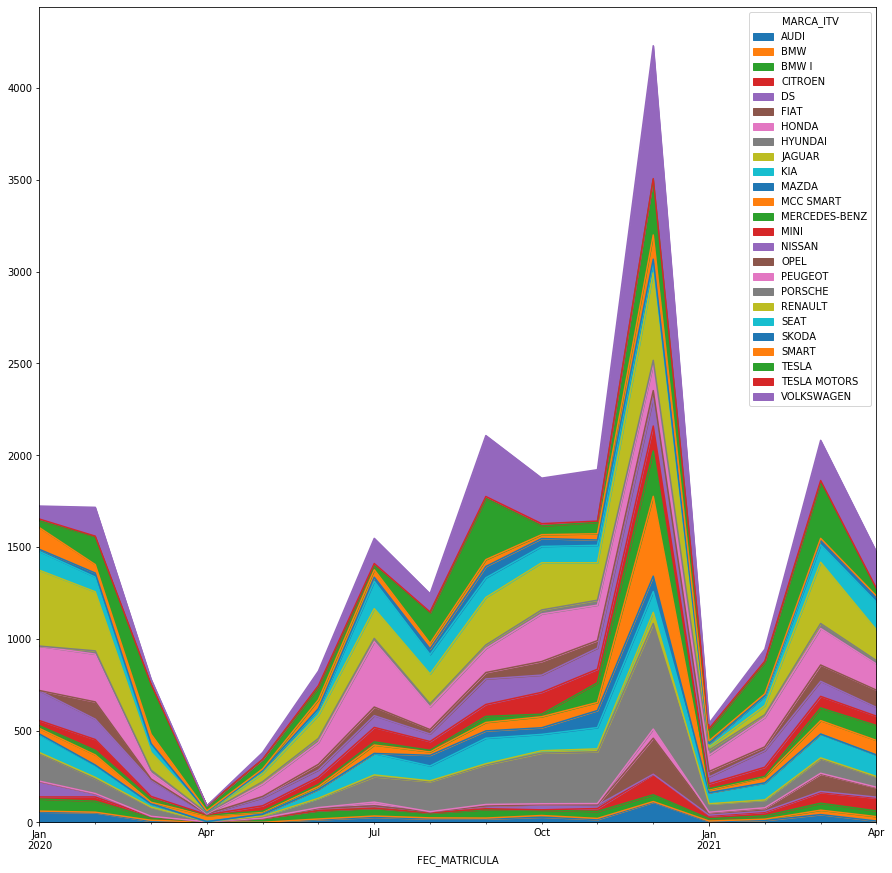

In [96]:
bev_month.plot(figsize=(15,15), kind='area')

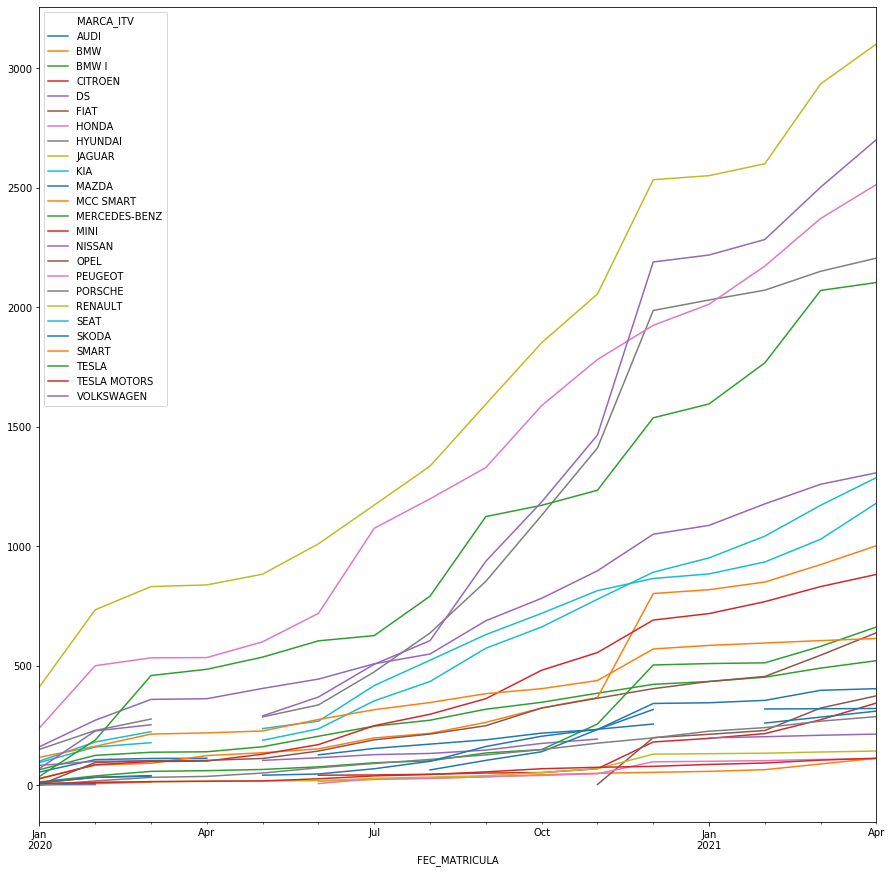

In [97]:
bev_month_cum = bev_month.cumsum()

bev_month_cum.plot(figsize=(15,15), kind='line')